In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

C:\Users\MasterKey\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
dataset = pd.read_csv('dataset1.csv',header=0)
dataset = dataset.dropna()
print(dataset.shape)
print(list(dataset.columns))
dataset.head()

(967, 16)
['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


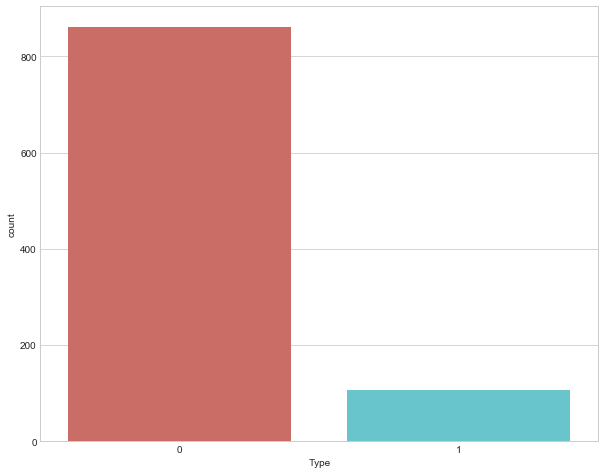

In [4]:
sb.countplot(x='Type',data=dataset, palette='hls')

In [5]:
dataset.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1780
Data columns (total 16 columns):
URL_LENGTH                   967 non-null int64
NUMBER_SPECIAL_CHARACTERS    967 non-null int64
CHARSET                      967 non-null object
SERVER                       967 non-null object
CONTENT_LENGTH               967 non-null float64
TCP_CONVERSATION_EXCHANGE    967 non-null int64
DIST_REMOTE_TCP_PORT         967 non-null int64
REMOTE_IPS                   967 non-null int64
APP_BYTES                    967 non-null int64
SOURCE_APP_PACKETS           967 non-null int64
REMOTE_APP_PACKETS           967 non-null int64
SOURCE_APP_BYTES             967 non-null int64
REMOTE_APP_BYTES             967 non-null int64
APP_PACKETS                  967 non-null int64
DNS_QUERY_TIMES              967 non-null float64
Type                         967 non-null int64
dtypes: float64(2), int64(12), object(2)
memory usage: 168.4+ KB


In [7]:
dataset_data = dataset.drop(['CHARSET', 'SERVER','APP_BYTES','CONTENT_LENGTH'], 1)
dataset_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,7,0,2,9,10,1153,832,9,2.0,1
1,16,6,17,7,4,17,19,1265,1230,17,0.0,0
2,16,6,0,0,0,0,0,0,0,0,0.0,0
3,17,6,31,22,3,39,37,18784,4380,39,8.0,0
4,17,6,57,2,5,61,62,129889,4586,61,4.0,0


In [8]:
dataset_dmy = dataset_data

In [9]:
dataset_dmy.drop(['TCP_CONVERSATION_EXCHANGE', 'DNS_QUERY_TIMES'],axis=1,inplace=True)
dataset_dmy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,Type
0,16,7,0,2,9,10,1153,832,9,1
1,16,6,7,4,17,19,1265,1230,17,0
2,16,6,0,0,0,0,0,0,0,0
3,17,6,22,3,39,37,18784,4380,39,0
4,17,6,2,5,61,62,129889,4586,61,0


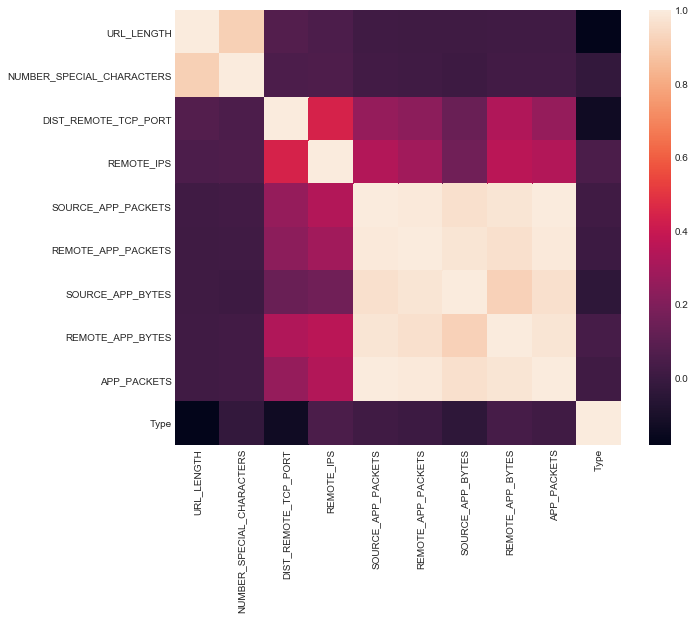

In [10]:
sb.heatmap(dataset_dmy.corr())  

In [11]:
dataset_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1780
Data columns (total 10 columns):
URL_LENGTH                   967 non-null int64
NUMBER_SPECIAL_CHARACTERS    967 non-null int64
DIST_REMOTE_TCP_PORT         967 non-null int64
REMOTE_IPS                   967 non-null int64
SOURCE_APP_PACKETS           967 non-null int64
REMOTE_APP_PACKETS           967 non-null int64
SOURCE_APP_BYTES             967 non-null int64
REMOTE_APP_BYTES             967 non-null int64
APP_PACKETS                  967 non-null int64
Type                         967 non-null int64
dtypes: int64(10)
memory usage: 123.1 KB


In [12]:
X = dataset_dmy.ix[:,(0,1,2,3,4,5,6,7,8)].values
y = dataset_dmy.ix[:,9].values

C:\Users\MasterKey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=25)

In [14]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = LogReg.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[81,  4],
       [ 7,  5]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94        85
          1       0.56      0.42      0.48        12

avg / total       0.88      0.89      0.88        97



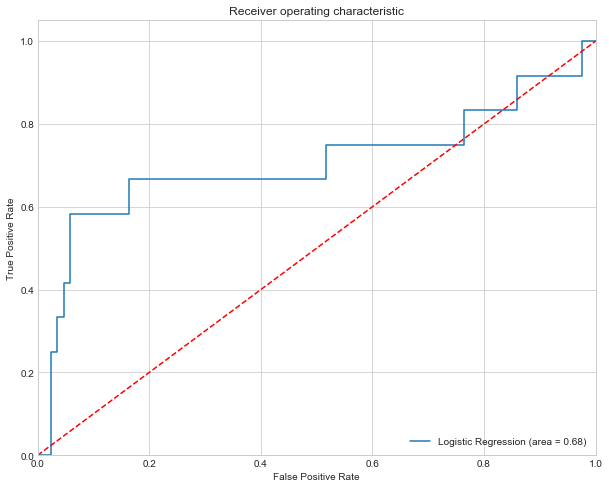

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [21]:
y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
